In [8]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [9]:
# Load datasets
train_df = pd.read_csv("../data/normalized_train_data.csv")
test_df  = pd.read_csv("../data/normalized_test_data.csv")

# Check structure
train_df.head()        

,output,input1,input2,input3,input4,input5,input6,input7,input8,input9,...,input12,input13,input14,input15,input16,input17,input18,input19,input20,input21
0,0.364444,0.0,0.570312,0.778443,0.543058,0.538462,0.621350,0.314136,0.634801,0.667774,...,0.566327,0.583333,0.361702,0.275362,0.107744,0.247059,0.063545,0.079330,0.496855,0.511770
1,0.408889,0.0,0.574219,0.784431,0.532513,0.538462,0.645285,0.418848,0.602578,0.634551,...,0.515306,0.277778,0.297872,0.275362,0.090909,0.200000,0.063545,0.081564,0.484277,0.450741
2,0.431111,0.0,0.589844,0.782934,0.534271,0.538462,0.645285,0.261780,0.624060,0.568106,...,0.553571,0.388889,0.297872,0.275362,0.090909,0.211765,0.063545,0.082682,0.471698,0.485615
3,0.440000,0.0,0.580078,0.782934,0.532513,0.538462,0.645285,0.261780,0.613319,0.601329,...,0.642857,0.388889,0.340426,0.275362,0.090909,0.258824,0.063545,0.083799,0.471698,0.572799
4,0.422222,0.0,0.589844,0.796407,0.525483,0.538462,0.645285,0.261780,0.613319,0.568106,...,0.655612,0.444444,0.340426,0.347826,0.090909,0.223529,0.063545,0.083799,0.471698,0.564080


In [10]:
# check shape -
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (7642, 22)
Test shape: (3337, 22)


In [11]:
# Assumption:
# Last column = Target

X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]


# Check Labels:
print(y_train.value_counts())

input21
0.476896    300
0.468178    298
0.503051    294
0.450741    283
0.494333    280
           ... 
0.973845      1
0.860506      1
0.869224      1
0.602441      1
0.531822      1
Name: count, Length: 100, dtype: int64


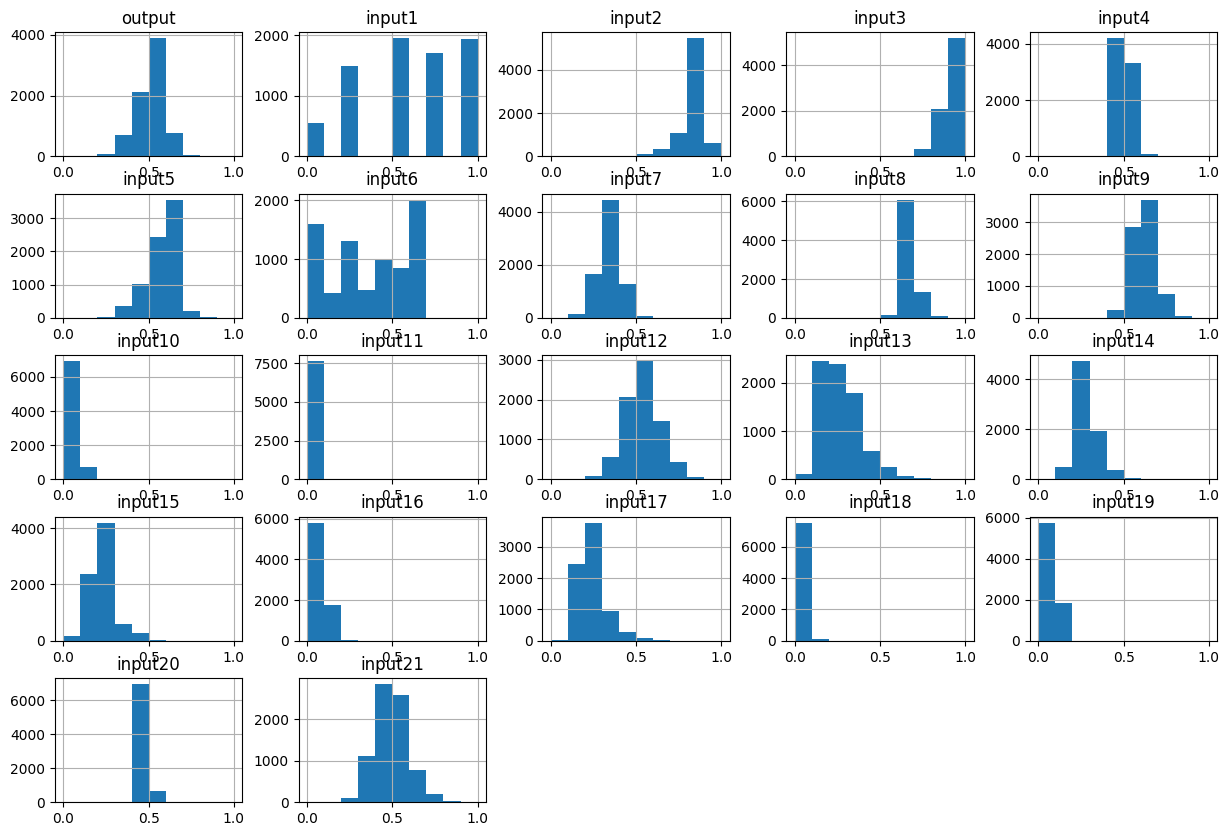

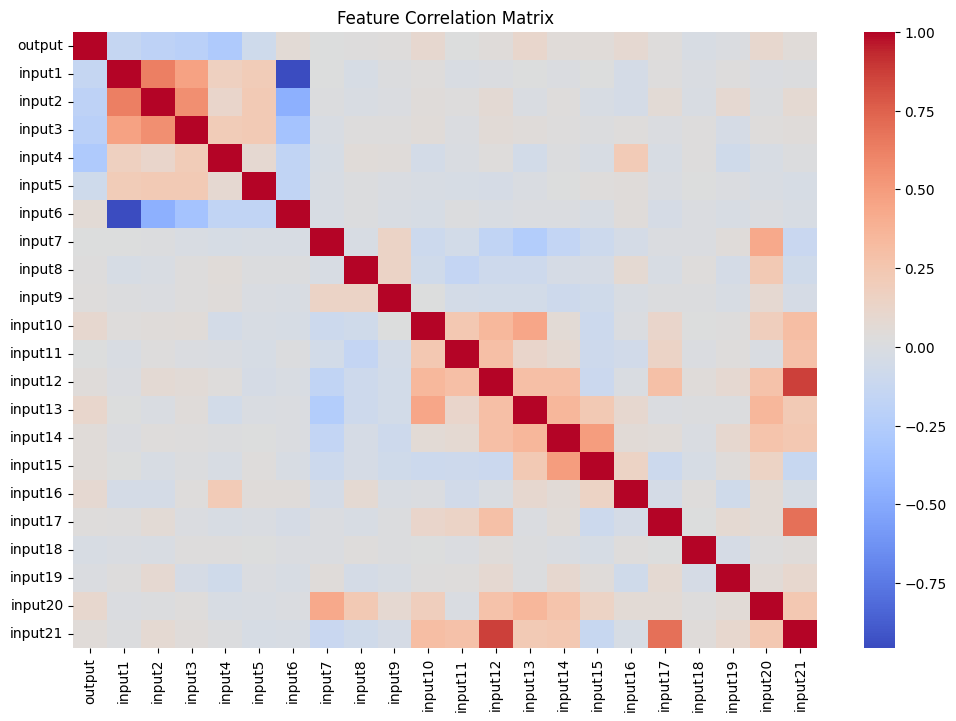

In [12]:
# Check Missing Values
train_df.isnull().sum()

# Feature Distribution
train_df.hist(figsize=(15, 10))
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression(model, X_test, y_test):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return mae, mse, rmse, r2

In [14]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_results = evaluate_regression(lr, X_test, y_test)
lr_results

# Support Vector Regression (SVR)
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

svr_results = evaluate_regression(svr, X_test, y_test)
svr_results

# KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

knn_results = evaluate_regression(knn, X_test, y_test)
knn_results

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_results = evaluate_regression(dt, X_test, y_test)
dt_results 

# Random Forest Regressor (BEST MODEL)
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)

rf_results = evaluate_regression(rf, X_test, y_test)
rf_results

(0.04995314067803023,
 0.0039858169777337304,
 np.float64(0.06313332699718692),
 0.38950937034064514)

In [15]:
# Compare All Models (RESULT TABLE)

results_df = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "SVR",
        "KNN Regressor",
        "Decision Tree",
        "Random Forest"
    ],
    "MAE": [
        lr_results[0],
        svr_results[0],
        knn_results[0],
        dt_results[0],
        rf_results[0]
    ],
    "MSE": [
        lr_results[1],
        svr_results[1],
        knn_results[1],
        dt_results[1],
        rf_results[1]
    ],
    "RMSE": [
        lr_results[2],
        svr_results[2],
        knn_results[2],
        dt_results[2],
        rf_results[2]
    ],
    "R2 Score": [
        lr_results[3],
        svr_results[3],
        knn_results[3],
        dt_results[3],
        rf_results[3]
    ]
})

results_df

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,0.049304,0.003313,0.057555,0.492634
1,SVR,0.060051,0.005758,0.075884,0.118019
2,KNN Regressor,0.102750,0.013474,0.116078,-1.063761
3,Decision Tree,0.053273,0.004544,0.067411,0.303984
4,Random Forest,0.049953,0.003986,0.063133,0.389509


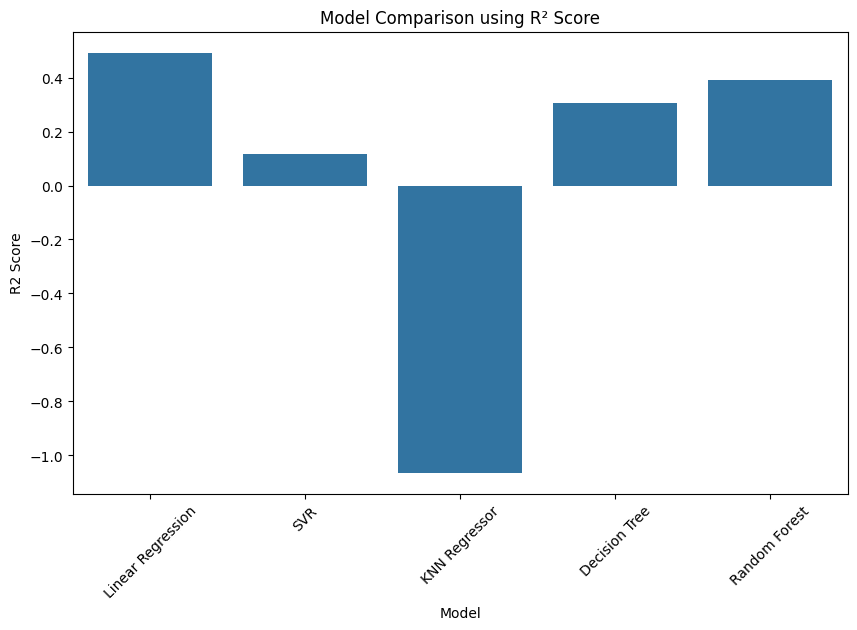

In [16]:
# R² Comparison

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R2 Score", data=results_df)
plt.xticks(rotation=45)
plt.title("Model Comparison using R² Score")
plt.show()

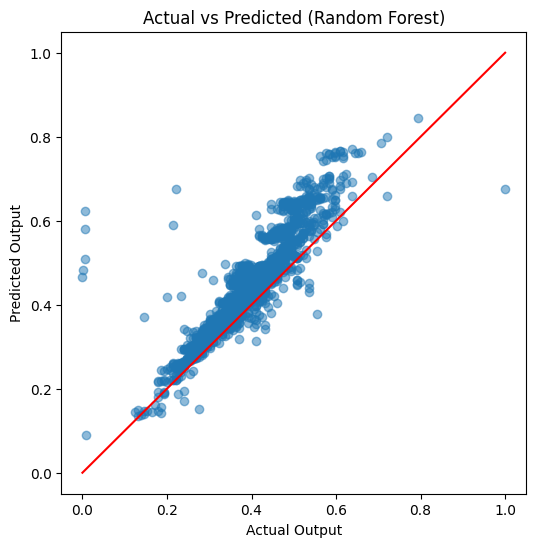

In [17]:
# Actual vs Predicted Plot 

y_pred_rf = rf.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.title("Actual vs Predicted (Random Forest)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")
plt.show()
